# 2. Data

Ideally, what we want is a heterogeneous group of car images, along with pictures of non-cars, so we can teach a model the difference between both. 

Variety here is important, because, as we know, cars come in many shapes and colors. We don't want to create a model to specifically recognize trucks or white Beetles, but any car.

## What data is available?

One approach would be to go out and take as many pictures of cars as possible.

Even though it might be a fun adventure, it wouldn't be scalable (time is money!). 

Fortunately, there are many public datasets we can leverage on in order to hit the ground running. Here are several of them along with their official description:

  - [Vehicle Make and Model Recognition Dataset (VMMRdb)](http://vmmrdb.cecsresearch.org/): _The Vehicle Make and Model Recognition dataset (VMMRdb) is large in scale and diversity, containing 9,170 classes consisting of 291,752 images, covering models manufactured between 1950 to 2016. VMMRdb dataset contains images that were taken by different users, different imaging devices, and multiple view angles, ensuring a wide range of variations to account for various scenarios that could be encountered in a real-life scenario. The cars are not well aligned, and some images contain irrelevant background. The data was gathered by crawling web pages related to vehicle sales on craigslist.com, including 712 areas covering all 412 sub-domains corresponding to US metro areas. Our dataset can be used as a baseline for training a robust model in several real-life scenarios._
  - [Udacity Self-Driving Car](https://github.com/udacity/self-driving-car): _223GB of image frames and log data from 70 minutes of driving in Mountain View on two separate days, with one day being sunny, and the other overcast._
  - [The Comprehensive Cars (CompCars) dataset](http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/index.html): _The Comprehensive Cars (CompCars) dataset contains data from two scenarios, including images from web-nature and surveillance-nature. The web-nature data contains 163 car makes with 1,716 car models. There are a total of 136,726 images capturing the entire cars and 27,618 images capturing the car parts. The full car images are labeled with bounding boxes and viewpoints. Each car model is labeled with five attributes, including maximum speed, displacement, number of doors, number of seats, and type of car. The surveillance-nature data contains 50,000 car images captured in the front view. Please refer to our paper for the details. The dataset is well prepared for the following computer vision tasks: Fine-grained classification Attribute prediction Car model verification The train/test subsets of these tasks introduced in our paper are included in the dataset. Researchers are also welcome to utilize it for any other tasks such as image ranking, multi-task learning, and 3D reconstruction._
  - [Stanford Cars Dataset](http://ai.stanford.edu/~jkrause/cars/car_dataset.html): _The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe._

## However...

... we are using a different one!

We will use the [Vehicle Image Database](https://www.gti.ssr.upm.es/data/Vehicle_database.html). Here's the official description:

> The Image Processing Group is currently researching on the vision-based vehicle classification task. In order to evaluate our methods, we have created a new Database of images that we have extracted from our video sequences (acquired with a forward looking camera mounted on a vehicle). The database comprises 3425 images of vehicle rears taken from different points of view, and 3900 images extracted from road sequences not containing vehicles. Images are selected to maximize the representativity of the vehicle class, which involves a naturally high variability. In our opinion one important feature affecting the appearance of the vehicle rear is the position of the vehicle relative to the camera. Therefore, the database separates images in four different regions according to the pose: middle/close range in front of the camera, middle/close range in the left, close/middle range in the right, and far range. In addition, the images are extracted in such a way that they do not perfectly fit the contour of the vehicle in order to make the classifier more robust to offsets in the hypothesis generation stage. Instead, some images contain the vehicle loosely (some background is also included in the image), while others only contain the vehicle partially. Several instances of a same vehicle are included with different bounding hypotheses. The images have 64x64 and are cropped from sequences of 360x256 pixels recorded in highways of Madrid, Brussels and Turin.

Amongst the main reasons we opted for this dataset are:

 - It already has the data divided in _car_ and _non-car_ categories.
 - It is small enough to allow fast experimentation and keep this project brief and to the point.


## Let's explore

The dataset is in the `data/` folder. The car images are in the `vehicles` subfolder and the non-car images in the `non-vehicles` subdirectory.

Let's first see how many images are there per category:

In [1]:
import glob
vehicles_images_path = glob.glob('data/vehicles/*/*.png')
print(f'There are {len(vehicles_images_path)} images of cars.')

non_vehicles_images_path = glob.glob('data/non-vehicles/*/*.png')
print(f'There are {len(non_vehicles_images_path)} images of non-cars.')

There are 3425 images of cars.
There are 3900 images of non-cars.


Good. We are dealing with a somewhat balanced dataset. That'll make our lives easier because we can rely on accuracy as our metric.

Now, let's peek at some images:

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2

def plot_random_sample(images_path, sample_size, title):
    # Plot the images in the sample
    figure = plt.figure(figsize=(25, 25))

    sample = np.random.choice(images_path, sample_size)
    for sample_index, image_path in enumerate(sample):
        ax = figure.add_subplot(1, sample_size, sample_index + 1, xticks=[], yticks=[])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.set_title(title)

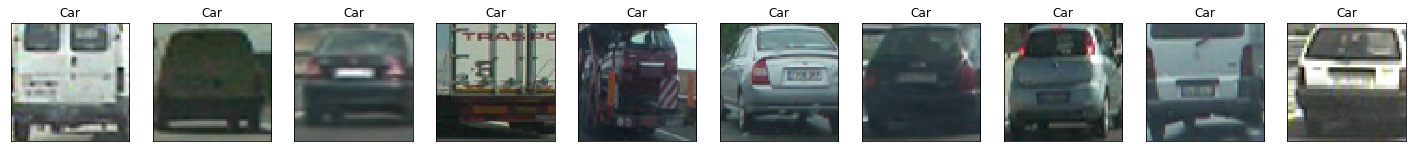

In [3]:
plot_random_sample(vehicles_images_path, 10, 'Car')

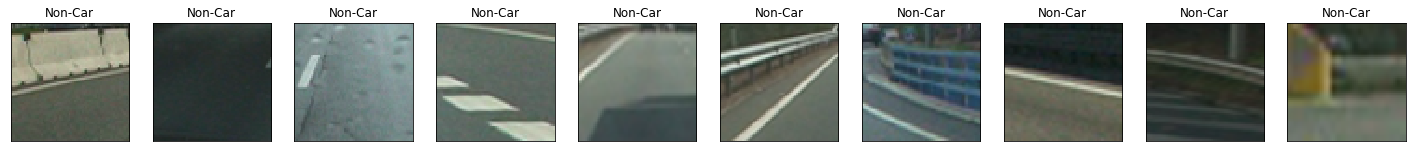

In [4]:
plot_random_sample(non_vehicles_images_path, 10, 'Non-Car')

We observe that the `vehicles` category contains from trucks to compact vehicles, which is nice because it gives the model a broader perspective of what a vehicle is.

Similarly, the `non-vehicles` category is composed mostly of elements we would find on a road, which is very useful if we want to use the resulting model in a self-driving car.

## One last sanity check

Let's check that, in fact, each image is 64x64, as the official dataset description affirms.

In [7]:
assert all(cv2.imread(i).shape == (64, 64, 3) for i in vehicles_images_path)
assert all(cv2.imread(i).shape == (64, 64, 3) for i in non_vehicles_images_path)